In [2]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data")

Skipping, found downloaded files in "./housing-price-prediction-data" (use force=True to force download)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("/content/housing-price-prediction-data/housing_price_dataset.csv")

In [4]:
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [5]:
data.isna().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [6]:
from sklearn import linear_model
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data["Neighborhood"] = le.fit_transform(data["Neighborhood"])

data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


In [7]:
reg = linear_model.LinearRegression()
reg.fit(data[["SquareFeet","Bedrooms","Bathrooms","Neighborhood","YearBuilt"]], data.Price)

LinearRegression()

In [8]:
reg.coef_

array([  99.3491404 , 5076.32859775, 2830.03311391,  773.9244851 ,
        -11.01201598])

In [9]:
reg.intercept_

23178.580465551786

Predict price for following features:
SquareFeet	2500

Bedrooms	3

Bathrooms	2

Neighborhood	Urban (2)-
for, Rural 0, Suburban 1, Urban 2

YearBuilt	2007

****

In [15]:
reg.predict([[2500,3,2,2,2007]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([271887.21639664])

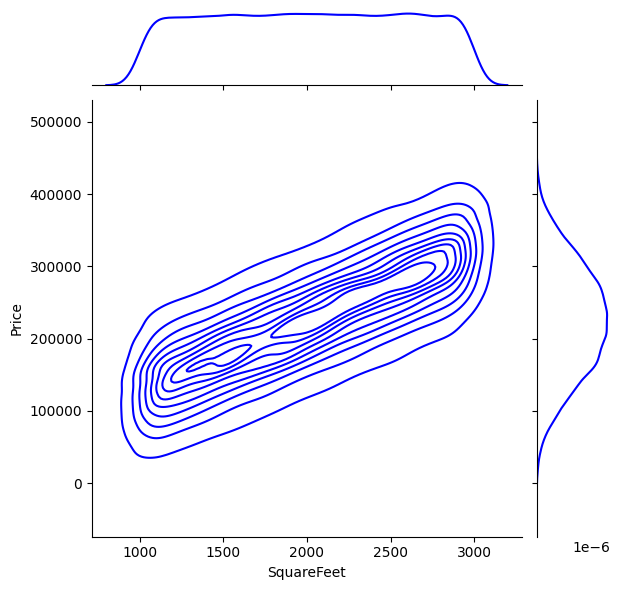

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(x="SquareFeet", y="Price", data=data, kind = "kde", color = "b")

In [17]:
data.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.011186,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004208,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.001613,0.003748,0.028418
Neighborhood,0.011186,-0.004208,0.001613,1.000000,-0.000174,0.016429
YearBuilt,0.000482,0.003147,0.003748,-0.000174,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.016429,-0.002288,1.000000


<Axes: >

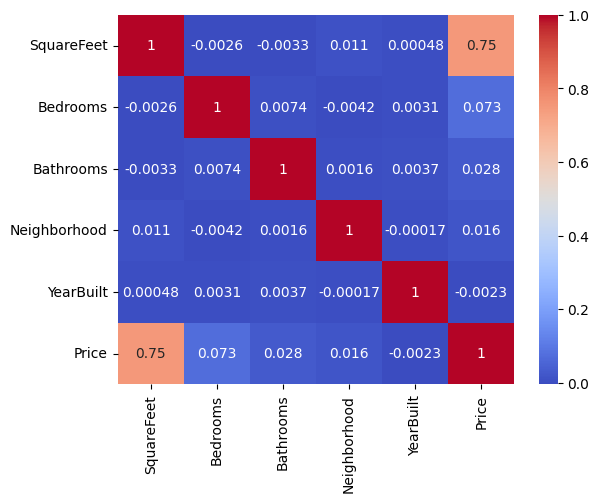

In [18]:
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")